In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("ORCL.csv")

In [16]:
df.head()

,Date,Year,Month,Day,Weekday,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2014-01-02,2014,1,2,Thursday,38.029999,37.549999,37.840000,18162100.0,35.027382,0.000000,35.027382,35.027382
1,2014-01-03,2014,1,3,Friday,37.860001,37.560001,37.619999,11693900.0,34.934536,-0.002651,34.980959,34.980959
2,2014-01-06,2014,1,6,Monday,37.799999,37.419998,37.470001,15329400.0,34.795242,-0.003987,34.919053,34.919053
3,2014-01-07,2014,1,7,Tuesday,37.930000,37.500000,37.849998,16792200.0,35.148109,0.010141,34.976317,34.976317
4,2014-01-08,2014,1,8,Wednesday,37.910000,37.560001,37.720001,16111600.0,35.027397,-0.003434,34.986533,34.986533


In [17]:
#function for trade bollinger
def tradeBollinger(year, w, k):
    sds = df.loc[df['Year'] == year]['Adj Close'].rolling(window=w, min_periods=1).std()
    mas = df.loc[df['Year'] == year]['Adj Close'].rolling(window=w, min_periods=1).mean()
    adj_closes = df.loc[df['Year'] == year]['Adj Close']
    own_stock = False
    gains = np.array([])
    losses = np.array([])
    for ma, sd, adj in zip(mas, sds, adj_closes):
        if adj < ma - k * sd:
            if adj <= 100:
                stock_owned = 100 // adj
                bid = adj
                own_stock = True
                
        elif own_stock and adj > ma + k * sd:
            sell = adj * stock_owned
            profit = sell - bid * stock_owned
            own_stock = False
            if profit > 0:
                gains = np.append(gains, profit)
            elif profit < 0:
                losses = np.append(losses, profit)
    return gains, losses

#function to get average of gain 
def getAveGain(gains):
    if gains.size != 0:
        ave_gain = np.mean(gains)
    else: ave_gain = None
    return ave_gain

#function  to get average of loss
def getAveLoss(losses):
    if losses.size != 0:
        ave_loss = np.mean(losses)
    else: ave_loss = None
    return ave_loss
    


In [18]:
#list of ks and ws  
ks = np.linspace(5, 35, 5) / 10
ws = list(range(10, 110, 10))

In [19]:
#obtain dictionary of gain and loss and create dataframe
gain_dict = {'W': ws}
loss_dict = {'W': ws}
for k in ks:
    gain_list = []
    loss_list = []
    for w in ws:
        gains, losses = tradeBollinger(2018, w, k)
        ave_gain = getAveGain(gains)
        ave_loss = getAveLoss(losses)
        gain_list.append(ave_gain)
        loss_list.append(ave_loss)
    gain_dict[k] = gain_list
    loss_dict[k] = loss_list    
df_gain = pd.DataFrame(data=gain_dict).fillna(0.0)
df_gain = df_gain.set_index("W")
df_loss = pd.DataFrame(data=loss_dict).fillna(0.0)
df_loss = df_loss.set_index("W")


In [20]:
df_gain

,0.5,1.25,2.0,2.75,3.5
W,,,,,
10,2.254096,3.560154,5.357132,0.000000,0.00000
20,3.437756,4.906250,8.251157,0.000000,0.00000
30,3.849453,6.762611,10.390686,14.877739,0.00000
40,3.869217,6.891389,10.013554,14.877739,0.00000
50,3.949704,7.363768,9.984028,14.877739,16.76049
60,4.246161,7.355169,11.280659,0.000000,0.00000
70,4.163927,7.711591,11.150299,0.000000,0.00000
80,3.910385,8.192513,7.757439,0.000000,0.00000
90,4.368986,9.764050,16.760490,0.000000,0.00000


In [21]:
df_loss

,0.5,1.25,2.0,2.75,3.5
W,,,,,
10,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0
30,0.0,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0
70,0.0,0.0,0.0,0.0,0.0
80,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0


In [22]:
#prepare for the data visualization
def prepData(df):
    data = np.array([])
    for w in df.index:
        data = np.append(data, df.loc[w])
    return data
#prepare for the axis of visualization
def prepAxis(df):
    index = list(df.index)
    column = list(df.columns)
    x = []
    for i in index:
        for c in range(len(column)):
            x.append(i)
    y = column * len(index)
    return x, y


In [23]:
gain_data = prepData(df_gain)
loss_data = prepData(df_loss)
gain_x, gain_y = prepAxis(df_gain)
loss_x, loss_y = prepAxis(df_loss)

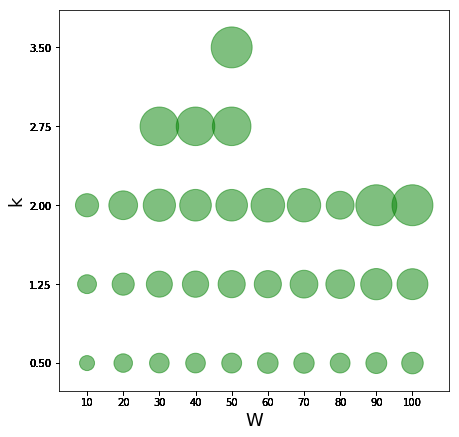

In [24]:
#visualiza
plt.figure(figsize=(7,7))
plt.xticks(gain_x)
plt.yticks(gain_y)
plt.scatter(gain_x, gain_y, s = gain_data * 100 , color = 'g', alpha = 0.5)
plt.scatter(loss_x, loss_y, s = loss_data  * 100, color = 'r', alpha = 0.5 )
plt.xlabel('W', fontsize=18)
plt.ylabel('k', fontsize=18)
plt.show()